<a href="https://colab.research.google.com/github/yuli4ka/fontRecognition/blob/main/fontRecognitionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import zipfile
import urllib.request
import sys
import random
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import os

In [43]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adagrad
from keras.constraints import maxnorm
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from google.colab.patches import cv2_imshow

In [44]:
np.random.seed(42) 

In [45]:
download = "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip"

with urllib.request.urlopen( download ) as url:
  output = open("./fonts.zip", "wb")
  output.write(url.read())
  output.close()

zip_ref = zipfile.ZipFile("./fonts.zip", 'r')
zip_ref.extractall("./fonts/")
zip_ref.close()

In [46]:
!cd fonts/ && ls

 AGENCY.csv	       'FELIX TITLING.csv'     OCRB.csv
 ARIAL.csv	        FOOTLIGHT.csv	       ONYX.csv
 BAITI.csv	        FORTE.csv	       PALACE.csv
 BANKGOTHIC.csv         FRANKLIN.csv	       PALATINO.csv
 BASKERVILLE.csv        FREESTYLE.csv	       PANROMAN.csv
 BAUHAUS.csv	        FRENCH.csv	       PAPYRUS.csv
 BELL.csv	        GABRIOLA.csv	       PERPETUA.csv
 BERLIN.csv	        GADUGI.csv	       PHAGSPA.csv
 BERNARD.csv	        GARAMOND.csv	       PLAYBILL.csv
 BITSTREAMVERA.csv      GEORGIA.csv	       PMINGLIU-EXTB.csv
 BLACKADDER.csv         GIGI.csv	       PRISTINA.csv
 BODONI.csv	        GILL.csv	       PROXY.csv
 BOOK.csv	        GLOUCESTER.csv	       QUICKTYPE.csv
 BOOKMAN.csv	        GOTHICE.csv	       RAGE.csv
 BRADLEY.csv	        GOUDY.csv	       RAVIE.csv
 BRITANNIC.csv	        GUNPLAY.csv	       REFERENCE.csv
 BROADWAY.csv	        HAETTENSCHWEILER.csv   RICHARD.csv
 BRUSH.csv	        HANDPRINT.csv	       ROCKWELL.csv
 BUXTON.csv	        HARLOW.csv	       ROMAN.csv
 CAARD

In [47]:
print(pd.read_csv("./fonts/"+"NINA"+".csv"))

      font fontVariant  m_label  strength  ...  r19c16  r19c17  r19c18  r19c19
0     NINA        NINA    64258       0.4  ...     255     255     255     255
1     NINA        NINA    64257       0.4  ...     255     255     255     255
2     NINA        NINA    61444       0.4  ...       1       1       1       1
3     NINA        NINA    61442       0.4  ...     255     255     255     255
4     NINA        NINA    61441       0.4  ...     255     255     255     255
...    ...         ...      ...       ...  ...     ...     ...     ...     ...
2273  NINA        NINA       37       0.7  ...      19       1       1       1
2274  NINA        NINA       36       0.7  ...       1       1       1       1
2275  NINA        NINA       35       0.7  ...       1       1       1       1
2276  NINA        NINA       34       0.7  ...       1       1       1       1
2277  NINA        NINA       33       0.7  ...       1       1       1       1

[2278 rows x 412 columns]


In [48]:
FONTS_TO_TRAIN = ['ARIAL','CALIBRI', 'FRENCH', 'IMPACT', 'ITALIC', 'JAVANESE', 'JOKERMAN', 'JUICE', 'KRISTEN', 
                  'MAGNETO', 'MODERN', 'RAGE', 'ROMAN', 'TAHOMA', 'TIMES', 'VERDANA', 'VIVALDI']

In [49]:
data = pd.concat([pd.read_csv("./fonts/"+name+".csv") for name in FONTS_TO_TRAIN]).sample(frac=1)

X = data.iloc[:,12:].values
X = np.true_divide(X,255)

idx_to_label = {idx:name for idx,name in enumerate(data.font.unique())}
label_to_idx = dict([[v,k] for k,v in idx_to_label.items()])

Y=data['font'].values
Y = to_categorical(list(map(lambda x : label_to_idx[x], Y)), num_classes=len(data.font.unique()))

splitpoint = int(math.floor(len(X)*0.8))

X_train, X_test = X[:splitpoint], X[splitpoint:]
Y_train, Y_test = Y[:splitpoint], Y[splitpoint:]

X_train = np.reshape(X_train,(-1,20,20,1))
X_test = np.reshape(X_test,(-1,20,20,1))

In [50]:
print("train: ", X_train.shape)
print("test: ", X_test.shape)

train:  (76298, 20, 20, 1)
test:  (19075, 20, 20, 1)


In [51]:
num_epoch = 5

In [52]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(20,20,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(FONTS_TO_TRAIN), activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=32, verbose=1, epochs=num_epoch)

print(
    "Accuracy for", num_epoch, "epoch:",
    round(model.evaluate(X_test, Y_test)[1], 2) * 100,
    "%"
)

Epoch 1/5
2385/2385 [==============================] - 66s 28ms/step - loss: 1.8655 - accuracy: 0.3697
Epoch 2/5
2385/2385 [==============================] - 66s 28ms/step - loss: 1.6125 - accuracy: 0.4473
Epoch 3/5
2385/2385 [==============================] - 65s 27ms/step - loss: 1.5031 - accuracy: 0.4808
Epoch 4/5
2385/2385 [==============================] - 67s 28ms/step - loss: 1.4324 - accuracy: 0.5012
Epoch 5/5
597/597 [==============================] - 5s 8ms/step - loss: 1.2093 - accuracy: 0.5847
Accuracy for 5 epoch: 57.99999999999999 %


In [53]:
print(history.history)
print(history.params)
print(history.history.keys())

{'loss': [1.8655235767364502, 1.6124755144119263, 1.5031415224075317, 1.432382583618164, 1.384381651878357], 'accuracy': [0.3697344660758972, 0.44728565216064453, 0.4807727634906769, 0.5011664628982544, 0.5183753371238708]}
{'verbose': 1, 'epochs': 5, 'steps': 2385}
dict_keys(['loss', 'accuracy'])


In [54]:
xc         = range(num_epoch)
train_acc = history.history['accuracy']

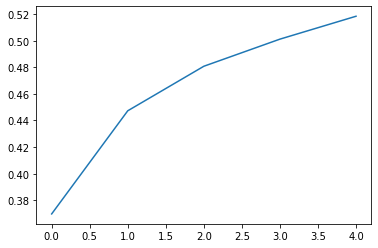

In [55]:
plt.figure()
plt.plot(xc, train_acc)

In [56]:
# plt.plot(
#     [x[1] for x in history.history], 
#     # [x[1] for x in history]
# )
# plt.xlabel('epoch number')
# plt.ylabel('accuracy')